In [81]:
# Load Libraries
import pandas as pd
import os 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [82]:
pip install plotly==5.6.0

Note: you may need to restart the kernel to use updated packages.


In [84]:
data = pd.read_csv("Resources/mental_health_clean_data.csv")
data.head()

,age,gender,country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,continent
0,37,female,United States,No Answer,No,Yes,Often,0-25,No,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,North America
1,44,male,United States,No Answer,No,No,Rarely,1000+,No,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,North America
2,32,male,Canada,No Answer,No,No,Rarely,0-25,No,Yes,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,North America
3,31,male,United Kingdom,No Answer,Yes,Yes,Often,26-100,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Europe
4,31,male,United States,No Answer,No,No,Never,100-500,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,North America


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        1253 non-null   int64 
 1   gender                     1253 non-null   object
 2   country                    1253 non-null   object
 3   self_employed              1253 non-null   object
 4   family_history             1253 non-null   object
 5   treatment                  1253 non-null   object
 6   work_interfere             1253 non-null   object
 7   no_employees               1253 non-null   object
 8   remote_work                1253 non-null   object
 9   tech_company               1253 non-null   object
 10  benefits                   1253 non-null   object
 11  care_options               1253 non-null   object
 12  wellness_program           1253 non-null   object
 13  seek_help                  1253 non-null   object
 14  anonymit

### Context
This dataset contains the following data:

- **Age**

- **Gender**

- **Country**

- **Continent**

- **self_employed**: Are you self-employed?

- **family_history**: Do you have a family history of mental illness?

- **treatment**: Have you sought treatment for a mental health condition?

- **work_interfere**: If you have a mental health condition, do you feel that it interferes with your work?

- **no_employees**: How many employees does your company or organization have?

- **remote_work**: Do you work remotely (outside of an office) at least 50% of the time?

- **tech_company**: Is your employer primarily a tech company/organization?

- **benefits**: Does your employer provide mental health benefits?

- **care_options**: Do you know the options for mental health care your employer provides?

- **wellness_program**: Has your employer ever discussed mental health as part of an employee wellness program?

- **seek_help**: Does your employer provide resources to learn more about mental health issues and how to seek help?

- **anonymity**: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

- **leave**: How easy is it for you to take medical leave for a mental health condition?

- **mentalhealthconsequence**: Do you think that discussing a mental health issue with your employer would have negative consequences?

- **physhealthconsequence**: Do you think that discussing a physical health issue with your employer would have negative consequences?

- **coworkers**: Would you be willing to discuss a mental health issue with your coworkers?

- **supervisor**: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

- **mentalhealthinterview**: Would you bring up a mental health issue with a potential employer in an interview?

- **physhealthinterview**: Would you bring up a physical health issue with a potential employer in an interview?

- **mentalvsphysical**: Do you feel that your employer takes mental health as seriously as physical health?

- **obs_consequence**: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

### Inspiration 

1. Explore Mental Health across geogrpahic regions and gender
2. Get insight into the tech employee: 
    - Explore Columns: **mentalhealthconsequence** , **mentalhealthinterview** , **coworkers**, and **supervisor**
    - Relate these columns to geographic regions, gender and if work interferes

Begin Analysis with Count of Mental Health Consequence Column

- We can see, there is a uneasiness with the tech employee

[Text(0.5, 1.0, 'Count of Mental Health Consequence Column')]

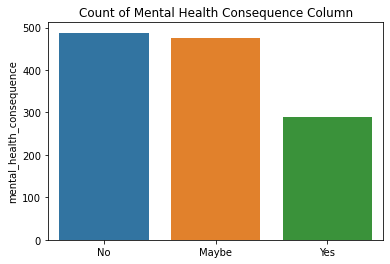

In [108]:
# Assign X= Mental Health Consequence, Y= Count of Mental Health Consequence
sns.barplot(data['mental_health_consequence'].unique(),
            data['mental_health_consequence'].value_counts()).set(title='Count of Mental Health Consequence Column')

[Text(0.5, 1.0, 'Count of Mental Health Interview Column')]

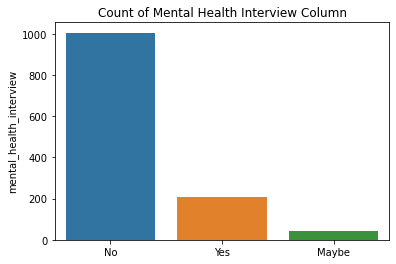

In [109]:
# Assign X= Mental Health Interview, Y= Count of Mental Health Interview
sns.barplot(data['mental_health_interview'].unique(), 
            data["mental_health_interview"].value_counts()).set(title = 'Count of Mental Health Interview Column')

count    1253.000000
mean       32.030327
std         7.367295
min         5.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: age, dtype: float64

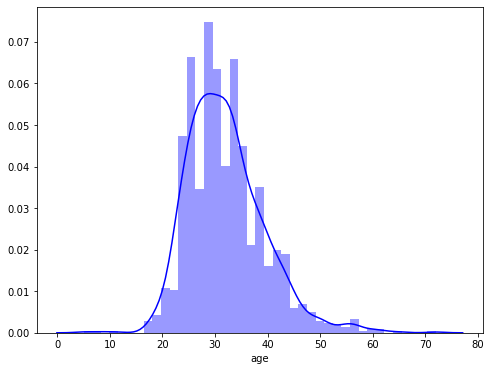

In [89]:
# Understand Age
plt.figure(figsize=(8,6))
sns.distplot(data["age"],color = 'b')

data["age"].describe()

As we can see, discussing a mental health issue with an employer has some uneasiness with the employee since there
are a lot of Maybes

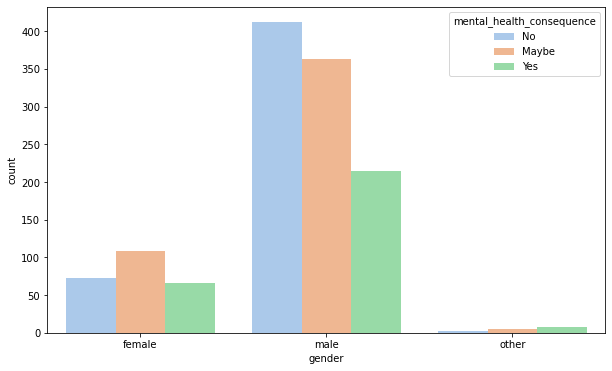

In [90]:
plt.figure(figsize = (10,6))
sns.countplot(x='gender', data = data, hue = 'mental_health_consequence', palette="pastel")
plt.show()

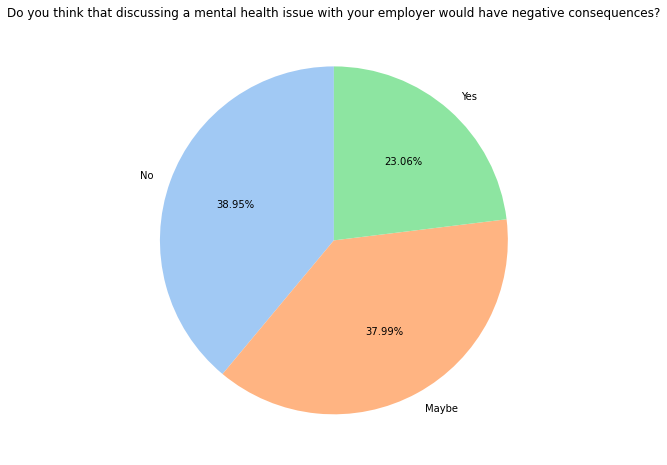

In [102]:
plt.figure(figsize = (20,8))
value = data['mental_health_consequence'].value_counts()
color = sns.color_palette('pastel')[0:5]

plt.title('Do you think that discussing a mental health issue with your employer would have negative consequences?')
plt.pie(value, autopct = '%0.02f%%', labels=  ['No', 'Maybe', 'Yes'], startangle = 90,colors = color)
plt.show()

Check to see if employees are willing to discuss their mental health during an interview with a potential employer


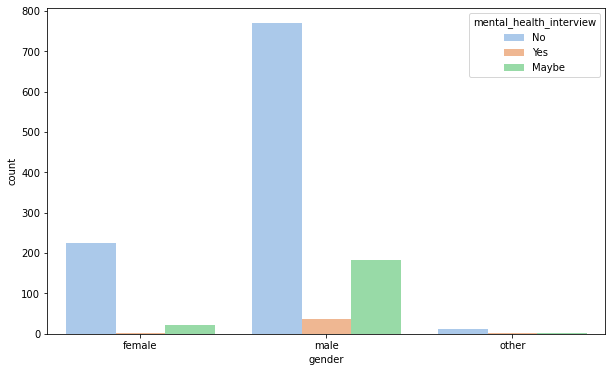

In [110]:
plt.figure(figsize= (10,6))
sns.countplot(x= data["gender"], hue= "mental_health_interview", data= data, palette="pastel")
plt.show()

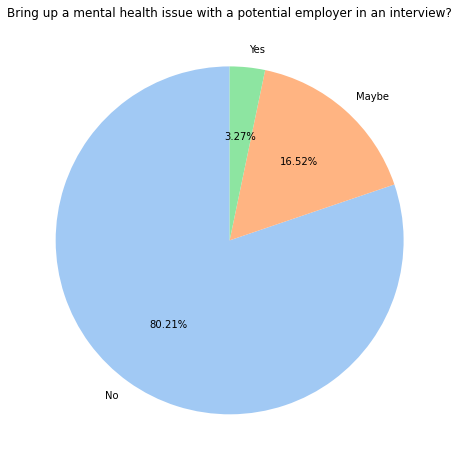

In [101]:
plt.figure(figsize = (20,8))
value = data['mental_health_interview'].value_counts()
color = sns.color_palette('pastel')[0:5]

plt.title('Bring up a mental health issue with a potential employer in an interview?')
plt.pie(value, autopct = '%0.02f%%', labels=  ['No', 'Maybe', 'Yes'], startangle = 90,colors = color)
plt.show()

Check by Gender if employees are willing to talk about their Mental Health

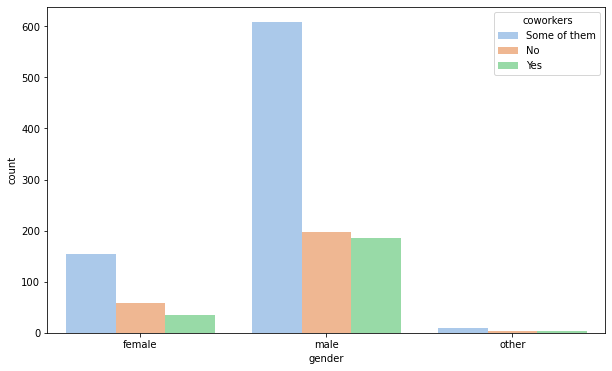

In [92]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['gender'], hue = 'coworkers', data = data, palette = "pastel")
plt.show()

Check by Gender, who is more open to their direct Supervisor abour their Mental Health

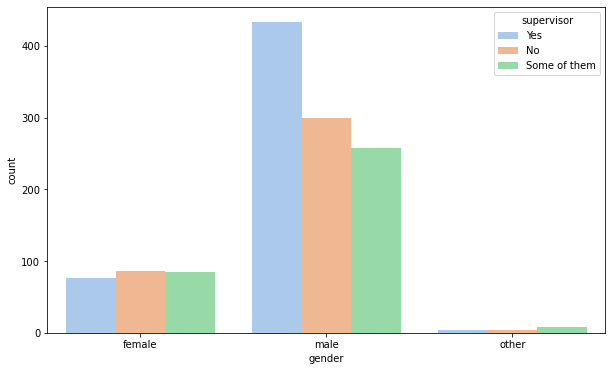

In [93]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['gender'], hue = 'supervisor', data = data, palette = "pastel")
plt.show()

Check by Gender, who gets more treatment for their Mental Health 

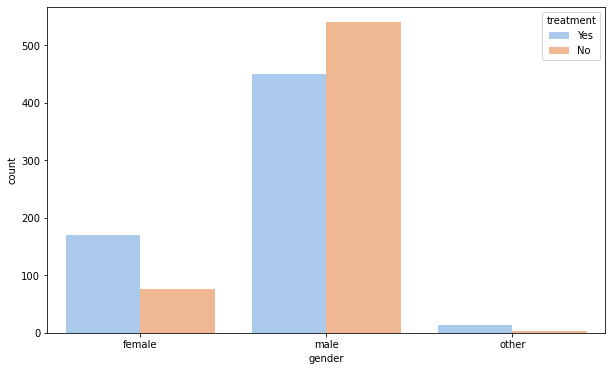

In [94]:
# Men tend to get less help compared to women
plt.figure(figsize=(10,6))
sns.countplot(x=data['gender'], hue = 'treatment', data = data, palette = "pastel")
plt.show()

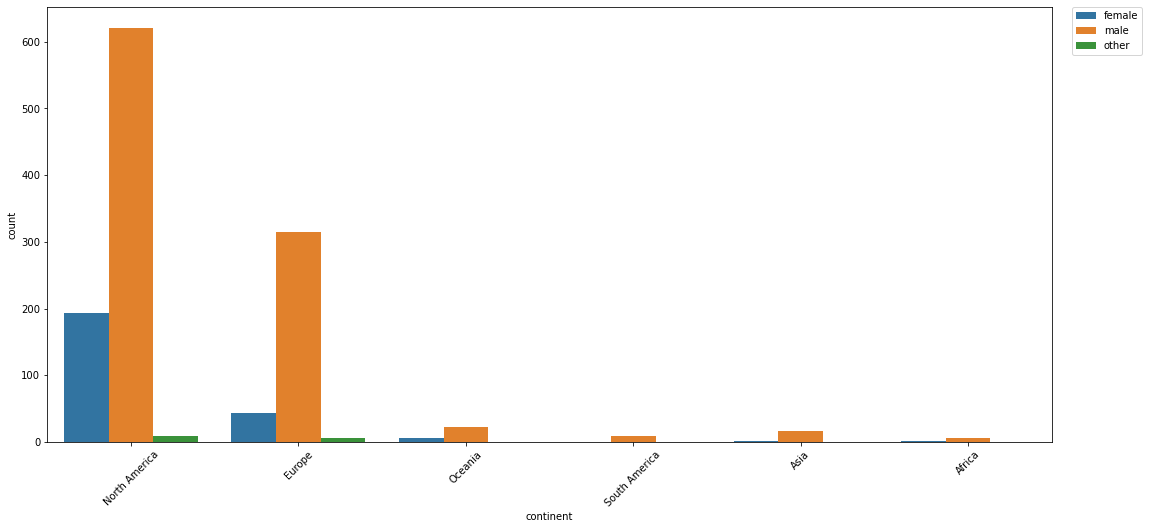

In [95]:
# Dive deeper into Gender count per Continent
plt.figure(figsize=(18,8))
sns.countplot(x="continent", hue = 'gender', data=data)
plt.legend(bbox_to_anchor= (1.02,1), loc= 2, borderaxespad=0.)
plt.xticks(rotation=45)
plt.show()